<a href="https://colab.research.google.com/github/Balachandar-Ganesan/GraphRAG/blob/main/StatTestpValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [1]:
!wget https://raw.githubusercontent.com/Balachandar-Ganesan/SampleDataset/refs/heads/main/SachinODI.csv

--2025-09-26 03:17:38--  https://raw.githubusercontent.com/Balachandar-Ganesan/SampleDataset/refs/heads/main/SachinODI.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33863 (33K) [text/plain]
Saving to: ‘SachinODI.csv’

SachinODI.csv       100%[===================>]  33.07K  --.-KB/s    in 0.003s  

2025-09-26 03:17:38 (9.94 MB/s) - ‘SachinODI.csv’ saved [33863/33863]



In [3]:
dfSachinData= pd.read_csv('/content/SachinODI.csv')

In [ ]:
from itertools import combinations

Opposition = dfSachinData['Opposition'].unique()
OppositionPairs = list(combinations(Opposition, 2))
OppositionPairs

In [7]:
from scipy.stats import mannwhitneyu

results = []

for Opp1, Opp2 in OppositionPairs:
    values1 = dfSachinData[dfSachinData['Opposition'] == Opp1]['Runs']
    values2 = dfSachinData[dfSachinData['Opposition'] == Opp2]['Runs']

    stat, p = mannwhitneyu(values1, values2, alternative='two-sided')

    results.append({
        'Opposition': Opp1,
        'Vs Opposition': Opp2,
        'p_value': p
    })

results_df = pd.DataFrame(results)

In [19]:
results_df.sort_values(by='p_value',ascending=False)


,Opposition,Vs Opposition,p_value
14,Sri Lanka,Zimbabwe,1.000000
99,Netherlands,United Arab Emirates,1.000000
102,United Arab Emirates,Bermuda,1.000000
104,Bermuda,Namibia,1.000000
93,Kenya,Bermuda,1.000000
...,...,...,...
13,Pakistan,Namibia,0.092700
78,South Africa,Kenya,0.092503
79,South Africa,Bangladesh,0.092399
26,Sri Lanka,Namibia,0.091016


In [12]:
import matplotlib.pyplot as plt


def plot_hist(Opposition1, Opposition2):
    plt.hist(dfSachinData[dfSachinData["Opposition"] == Opposition1]["Runs"], alpha=0.5, label=Opposition1)
    plt.hist(dfSachinData[dfSachinData["Opposition"] == Opposition2]["Runs"], alpha=0.5, label=Opposition2)
    plt.xlabel("Runs")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"{Opposition1} vs {Opposition2}")
    plt.show()

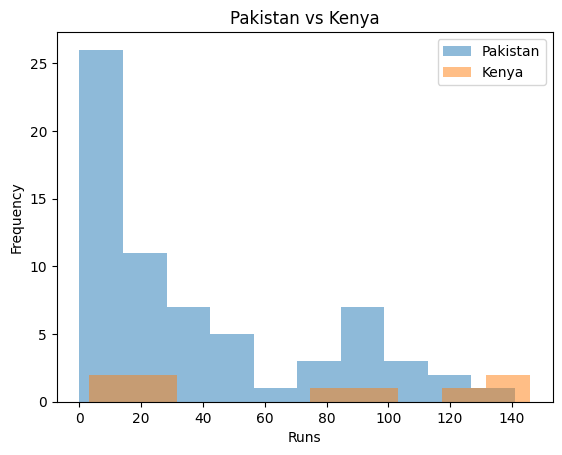

In [21]:
plot_hist('Pakistan', 'Kenya')